In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import pandas as pd

from src import fetch_bucketed_from_bitmex, preprocess, evaluate, train_linear, train_lstm

input_dir = 'cache_input'
model_dir = 'cache_model'
output_dir = 'cache_output'

# Crawling the Dataset

In [2]:
# df = fetch_bucketed_from_bitmex('XBTZ19', '1m')

In [3]:
df = pd.read_csv('cache_crawler/XBTZ19_1m.csv', index_col="timestamp", parse_dates=True)

# Feature Engineering

In [4]:
preprocess(df, input_dir)

In [5]:
pd.read_csv('cache_input/trai_x.csv', index_col="timestamp", parse_dates=True).describe()

,vwap_log,high_log,low_log,close_log,trades,home_notional,foreign_notional,macd_12_26,macd_sign_12_26,macd_diff_12_26,rsi_14,vwap_log_diff
count,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000,169448.000000
mean,0.604254,0.604234,0.604264,0.604252,-0.013505,-0.016414,0.008812,0.001282,0.001376,-0.000039,-0.026199,0.000733
std,0.712585,0.712780,0.712397,0.712588,0.906300,0.696612,0.828831,1.186409,1.186310,1.187042,0.981247,1.116070
min,-1.106937,-1.099545,-1.133254,-1.113737,-0.506434,-0.237273,-0.269087,-40.447757,-33.061488,-58.308665,-2.015079,-80.588247
25%,0.241116,0.240551,0.242080,0.241282,-0.441604,-0.231462,-0.261797,-0.344125,-0.345104,-0.394573,-0.801111,-0.246042
50%,0.664070,0.663047,0.664933,0.664087,-0.290332,-0.185012,-0.202731,-0.001176,-0.001315,-0.006836,-0.039461,0.000520
75%,1.055247,1.056898,1.054457,1.055372,0.055433,-0.036472,-0.012981,0.380826,0.382137,0.382304,0.743462,0.248850
max,2.563005,2.580954,2.563092,2.584123,23.502580,65.508553,67.863748,17.122046,16.328480,26.221021,2.014212,25.581883


# Training

### Benchmark: Linear Model

In [6]:
train_linear(
    input_dir=input_dir,
    output_dir=output_dir,
    model_dir=model_dir,
    hidden_dim=64,
    lr=1e-3,
    batch_size=1024,
    n_epochs=16,
)

Using device cpu.
| epoch | trai loss | vali loss | time/s |
| ----: | --------- | --------- | -----: |
|     0 | 1.225e+00 | 6.123e-01 |      0 |
|     1 | 1.204e+00 | 6.068e-01 |      0 |
|     2 | 1.201e+00 | 6.062e-01 |      0 |
|     3 | 1.201e+00 | 6.063e-01 |      0 |
|     4 | 1.200e+00 | 6.056e-01 |      0 |
|     5 | 1.199e+00 | 6.053e-01 |      0 |
|     6 | 1.198e+00 | 6.052e-01 |      0 |
|     7 | 1.197e+00 | 6.052e-01 |      0 |
|     8 | 1.197e+00 | 6.053e-01 |      0 |
|     9 | 1.197e+00 | 6.054e-01 |      0 |
|    10 | 1.197e+00 | 6.054e-01 |      0 |
|    11 | 1.197e+00 | 6.054e-01 |      0 |
|    12 | 1.197e+00 | 6.054e-01 |      0 |
|    13 | 1.197e+00 | 6.054e-01 |      0 |
|    14 | 1.197e+00 | 6.054e-01 |      0 |
|    15 | 1.197e+00 | 6.055e-01 |      0 |
loss of trai is 1.197e+00
loss of vali is 6.055e-01
loss of test is 5.968e-01


### Solution: LSTM Model

In [15]:
train_lstm(
    input_dir=input_dir,
    output_dir=output_dir,
    model_dir=model_dir,
    hidden_dim=256,
    lstm_layers=2,
    dropout=0.1,
    lr=1e-3,
    batch_size=1024,
    n_epochs=16,
)

# Evaluation

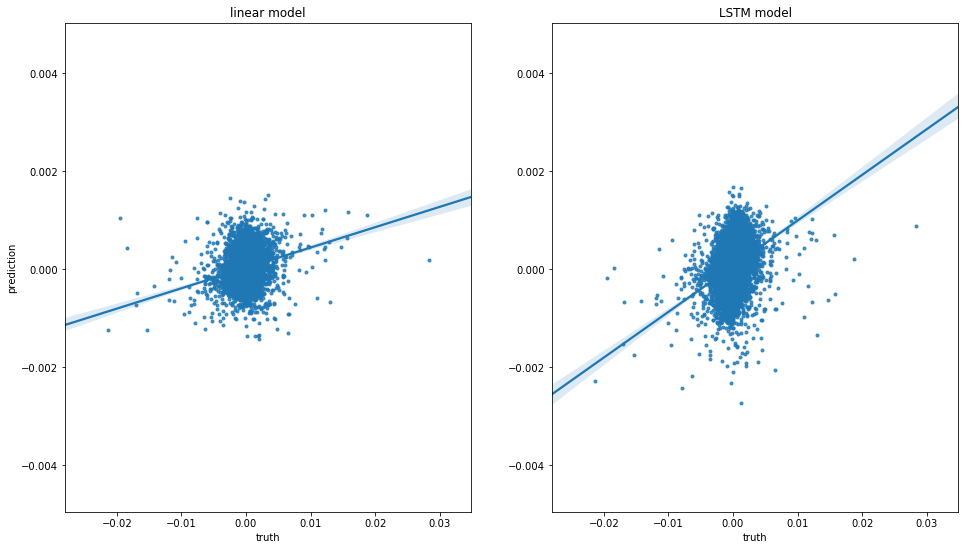

In [13]:
evaluate(input_dir, output_dir)